In [1]:
import pandas as pd
pd.set_option('max_columns', None)
# will force pandas to display any number of columns

import numpy as np

In [15]:
# Types of time series variables

# Time-series variables are populated by values that are specific to a point in time.
# Time is linear and infinitely fine-grained
# Time is a "special case" of an interval variable

In [9]:
# Dataset used: New York Stock Exchange
stocks = pd.read_csv('input/prices.csv', parse_dates=['date'])
print(stocks.sample(5))
stocks = stocks[stocks['symbol']=="GOOG"].set_index('date')
stocks.head()

             date symbol        open       close         low        high  \
82635  2010-09-14    STI   25.230000   25.910000   24.799999   26.480000   
713922 2015-11-30    ADI   60.389999   61.630001   60.389999   62.080002   
255938 2012-03-01     NI   23.980000   23.879999   23.799999   24.030001   
824852 2016-10-17     CI  120.629997  118.639999  116.300003  120.900002   
265529 2012-03-30   AMGN   67.660004   67.970001   67.250000   68.000000   

            volume  
82635   15399600.0  
713922   3358100.0  
255938   9637900.0  
824852   1943900.0  
265529   3857300.0  


,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOG,626.951088,626.751061,624.241073,629.511067,3927000.0
2010-01-05,GOOG,627.181073,623.991055,621.541045,627.841071,6031900.0
2010-01-06,GOOG,625.861078,608.261023,606.361042,625.861078,7987100.0
2010-01-07,GOOG,609.401025,594.101005,592.651008,610.001045,12876600.0
2010-01-08,GOOG,592.000997,602.021036,589.110988,603.251034,9483900.0


In [10]:
# the dataset indexed by date 
# the data being collected is being collected in the "period" of a day

# pandas has special type, the pandas.Period dtype, for this concept.

# Weakcase, dates act as timestamps(when an observation occurred)

In [21]:
shelter_outcomes = pd.read_csv('input/aac_shelter_outcomes.csv', 
    parse_dates=['date_of_birth', 'datetime'])
shelter_outcomes.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07,2014-07-07 14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [22]:
shelter_outcomes = shelter_outcomes[
    ['outcome_type', 'age_upon_outcome', 'datetime', 'animal_type', 'breed', 
     'color', 'sex_upon_outcome', 'date_of_birth']
]
shelter_outcomes.head()

,outcome_type,age_upon_outcome,datetime,animal_type,breed,color,sex_upon_outcome,date_of_birth
0,Transfer,2 weeks,2014-07-22 16:04:00,Cat,Domestic Shorthair Mix,Orange Tabby,Intact Male,2014-07-07
1,Transfer,1 year,2013-11-07 11:47:00,Dog,Beagle Mix,White/Brown,Spayed Female,2012-11-06
2,Adoption,1 year,2014-06-03 14:20:00,Dog,Pit Bull,Blue/White,Neutered Male,2013-03-31
3,Transfer,9 years,2014-06-15 15:50:00,Dog,Miniature Schnauzer Mix,White,Neutered Male,2005-06-02
4,Euthanasia,5 months,2014-07-07 14:04:00,Other,Bat Mix,Brown,Unknown,2014-01-07


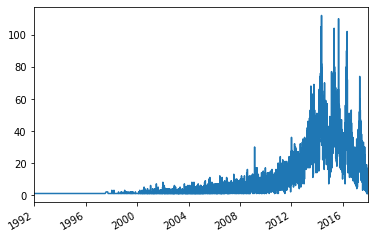

In [26]:
# Visualizing by grouping

shelter_outcomes['date_of_birth'].value_counts().sort_values().plot.line()
# the data is by day
# It looks like birth dates for the animals in the dataset peak at around 2015,
# but it's hard to tell for sure because the data is rather noisy.

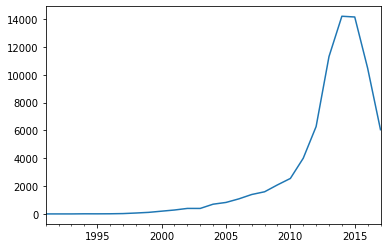

In [27]:
# Resampling
# Here we can globbe all dates together into years to reduce noise in data
# Resampling is often useful in data visualization because it can help clean up and denoise our plots by aggregating on a different level.

shelter_outcomes['date_of_birth'].value_counts().resample('Y').sum().plot.line()
# Clearly shows a peak in 2015, and also in 2014 (>2015)

In [28]:
'''Notice that pandas is automatically adapting the labels on the x-axis to match our output type.
This is because pandas is "datetime-aware";
it knows that when we have data points spaced out one year apart from one another, 
we only want to see the years in the labels, and nothing else!
'''

'Notice that pandas is automatically adapting the labels on the x-axis to match our output type.\nThis is because pandas is "datetime-aware";\nit knows that when we have data points spaced out one year apart from one another, \nwe only want to see the years in the labels, and nothing else!\n'

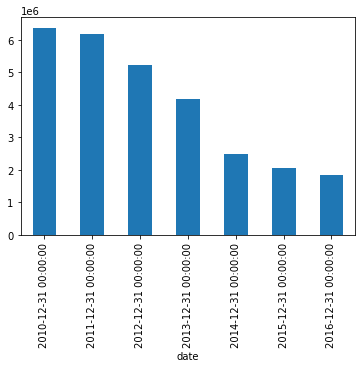

In [29]:
# bar chart which looks at the trade volume of the GOOG stock
stocks['volume'].resample('Y').mean().plot.bar()

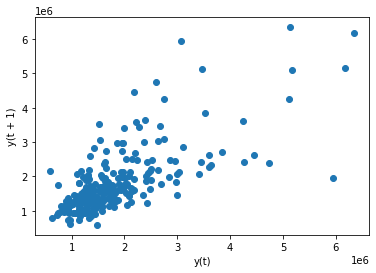

In [30]:
# Some new plot types

# Lag plot
# It compares data points from observation in the dataset against
# data points from a previous observation

from pandas.plotting import lag_plot

lag_plot(stocks['volume'].tail(250))

In [31]:
# It looks like days when volume is high are somewhat correlated with one another.
# A day of frantic trading does somewhat signal that the next day will also involve frantic trading.

In [38]:
# Time-series data tends to exhibit a behavior called periodicity: 
# rises and peaks in the data that are correlated with time.

# Lag plots are extremely useful because they are a simple way of checking datasets for this kind of periodicity.
# Note that they only work on "strong case" timeseries data.

# Lag is the time-difference for each observation in the dataset.
# Autocorrelation is correlation applied to lag.

In [33]:
# Autocorrelation plot
# A plot type that takes this concept and goes even further with it is the autocorrelation plot.
# This plot is a multivariate summarization-type plot
# that lets one check every peridiocity at the same time.
# It does this by computing a summary statistic - the correlation score
# across every possible lag in the dataset.
# This is known as autocorrelation.

# In an autocorrelation plot the lag is on the x-axis 
# and the autocorrelation score is on the y-axis.
# The farther away the autocorrelation score is from 0,
# the greater the influence that records that far away from each other exert on one another.

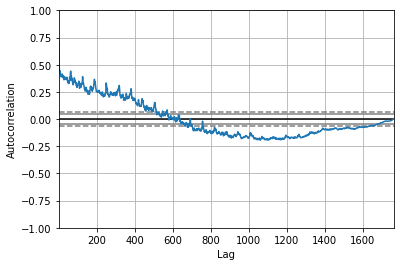

In [34]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(stocks['volume'])

In [35]:
'''It seems like the volume of trading activity is weakly descendingly correlated with trading volume from the year prior. There aren't any significant non-random peaks in the dataset, so this is good evidence that there isn't much of a time-series pattern to the volume of trade activity over time.'''

"It seems like the volume of trading activity is weakly descendingly correlated with trading volume from the year prior. There aren't any significant non-random peaks in the dataset, so this is good evidence that there isn't much of a time-series pattern to the volume of trade activity over time."

In [37]:
# Exercise on Cryptography Market Dataset

import pandas as pd

crypto = pd.read_csv("input/crypto-markets.csv")
crypto = crypto[crypto['name'] == 'Bitcoin']
crypto['date'] = pd.to_datetime(crypto['date'])
crypto.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


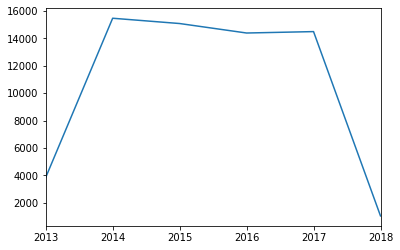

In [41]:
# A line chart depicting the datetime column in shelter_outcomes aggregated by year.

shelter_outcomes['datetime'].value_counts().resample('Y').count().plot.line()

In [ ]:
# A lag plot of cryptocurrency (crypto) trading volume from the last 250 days (hint: use tail).

